In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
CROP = 'maize'

In [3]:
ds = Dataset('cru_ts4.06.1901.1910.tmp.dat.nc')

In [4]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    title: CRU TS4.06 Mean Temperature
    institution: Data held at British Atmospheric Data Centre, RAL, UK.
    source: Run ID = 2204291347. Data generated from:tmp.2204291209.dtb
    history: Fri 29 Apr 14:35:01 BST 2022 : User f098 : Program makegridsauto.for called by update.for
    references: Information on the data is available at http://badc.nerc.ac.uk/data/cru/
    comment: Access to these data is available to any registered CEDA user.
    contact: support@ceda.ac.uk
    dimensions(sizes): lon(720), lat(360), time(120)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 time(time), float32 tmp(time, lat, lon), int32 stn(time, lat, lon)
    groups: 

In [5]:
ds['stn'][0].data[~ds['stn'][0].mask]

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

<IPython.core.display.Javascript object>


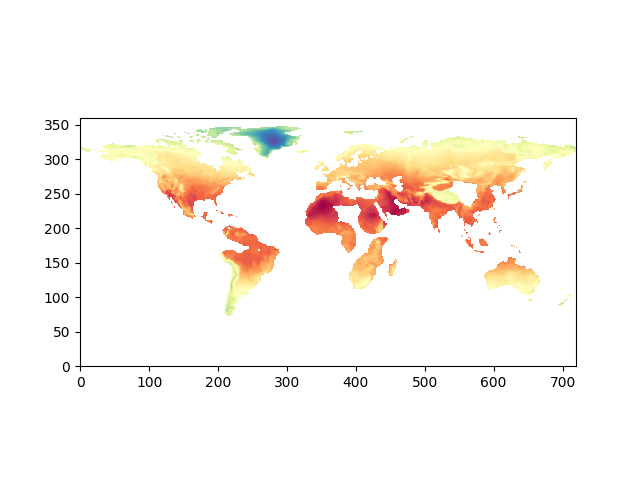

In [6]:
plt.figure()
re = ds['tmp'][7].data
re = np.where(~ds['tmp'][0].mask, re, np.nan)
re = np.where(ds['stn'][0].data > 0, re, np.nan)
plt.imshow(re, origin='lower', cmap='Spectral_r')

In [7]:
ds['tmp']

<class 'netCDF4._netCDF4.Variable'>
float32 tmp(time, lat, lon)
    long_name: near-surface temperature
    units: degrees Celsius
    correlation_decay_distance: 1200.0
    _FillValue: 9.96921e+36
    missing_value: 9.96921e+36
unlimited dimensions: time
current shape = (120, 360, 720)
filling on

In [8]:
ds = Dataset(f'/home/user/Documents/Dataset/cropYield/{CROP}/yield_1990.nc4')

In [9]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(720), lat(360)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 var(lat, lon)
    groups: 

In [10]:
ds.variables

{'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     units: degrees_east
     long_name: Longitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     units: degrees_north
     long_name: Latitude
 unlimited dimensions: 
 current shape = (360,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'var': <class 'netCDF4._netCDF4.Variable'>
 float32 var(lat, lon)
     _FillValue: -999000000.0
 unlimited dimensions: 
 current shape = (360, 720)
 filling on}

In [11]:
e = ds['var']

In [12]:
import numpy as np
r1 = e[:].data
m = e[:].mask
r = np.where(~m, r1, np.nan)

In [13]:
np.sum(~m)

15078

In [14]:
import matplotlib.pyplot as plt

In [15]:
np.min(r[~m])

0.017072363

<IPython.core.display.Javascript object>


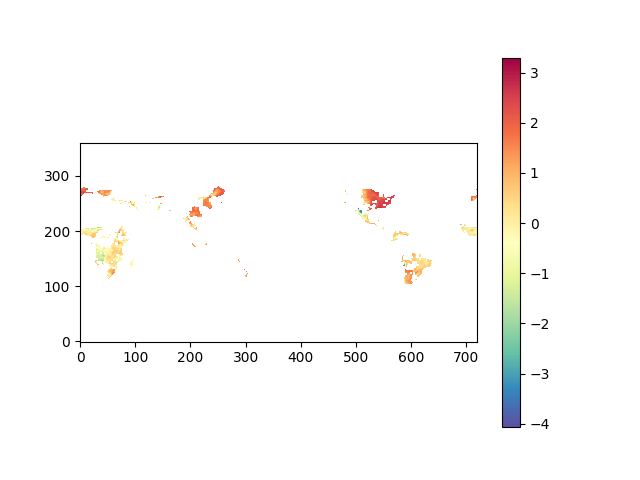

In [16]:
%matplotlib notebook

plt.figure()
plt.imshow(np.log(r), origin='lower', cmap='Spectral_r')
plt.colorbar()

<IPython.core.display.Javascript object>


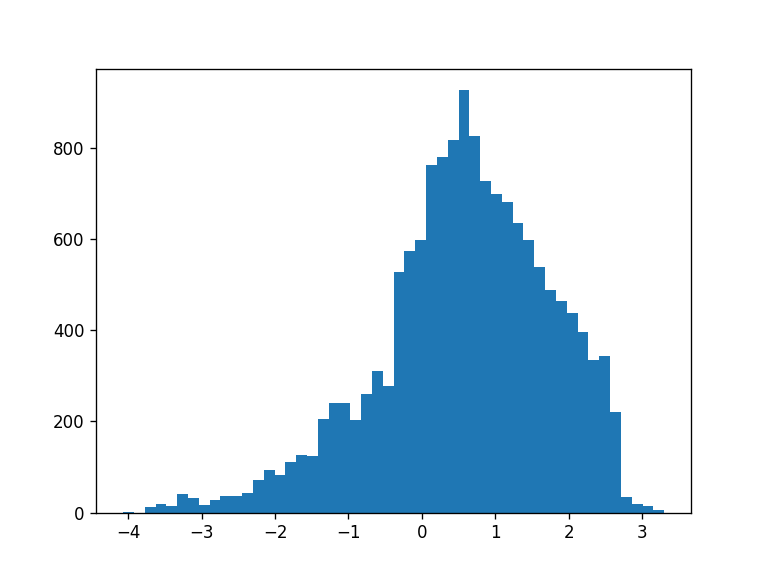

(array([  1.,   0.,  12.,  18.,  15.,  41.,  31.,  16.,  27.,  37.,  37.,
         44.,  72.,  93.,  83., 111., 127., 125., 206., 241., 240., 204.,
        259., 310., 277., 527., 573., 598., 763., 780., 818., 926., 826.,
        727., 699., 681., 636., 598., 539., 489., 464., 438., 397., 335.,
        344., 220.,  34.,  19.,  14.,   6.]),
 array([-4.07029438, -3.92286754, -3.77544045, -3.62801361, -3.48058677,
        -3.33315969, -3.18573284, -3.03830576, -2.89087892, -2.74345207,
        -2.59602499, -2.44859815, -2.3011713 , -2.15374422, -2.00631738,
        -1.85889041, -1.71146345, -1.56403661, -1.41660964, -1.26918268,
        -1.12175584, -0.97432888, -0.82690191, -0.67947501, -0.53204805,
        -0.38462114, -0.23719421, -0.08976728,  0.05765964,  0.20508657,
         0.35251349,  0.49994043,  0.64736736,  0.79479432,  0.94222122,
         1.08964813,  1.23707509,  1.38450205,  1.5319289 ,  1.67935586,
         1.82678282,  1.97420979,  2.12163663,  2.26906347,  2.41649055,
 

In [32]:
plt.figure()
plt.hist(np.log(r.flatten()), bins=50)

In [33]:
years = range(1981, 2010)
years_val = range(2010, 2014)


def build_features_targets(years):
    features, targets = [], []

    for year in years:
        data_year = Dataset(f'/home/user/Documents/Dataset/cropYield/{CROP}/yield_{year}.nc4')
        r1 = data_year['var'][:].data
        m = data_year['var'][:].mask
        #m[r1 == 0] = True
        r = np.where(~m, r1, np.nan)
        lat = data_year['lat'][:].data
        lon = data_year['lon'][:].data
        lat, lon = np.meshgrid(lat, lon, indexing='ij')
        year_array = year * np.ones(np.sum(~m))
        data_flat = (np.stack((lat[~m].flatten(), lon[~m].flatten(), year_array), axis=-1), r1[~m].flatten())
        features.append(data_flat[0])
        print(year, np.any(data_flat[1] == 0))
        targets.append(data_flat[1])

    features = np.concatenate(features)
    targets = np.concatenate(targets).reshape((-1, 1))
    targets = np.log(targets + 0.001)
    return features, targets

features, targets = build_features_targets(years)
features_val, targets_val = build_features_targets(years_val)

1981 False
1982 False
1983 False
1984 False
1985 False
1986 False
1987 False
1988 False
1989 False
1990 False
1991 False
1992 False
1993 False
1994 False
1995 False
1996 False
1997 False
1998 False
1999 False
2000 False
2001 False
2002 False
2003 False
2004 False
2005 True
2006 True
2007 True
2008 True
2009 True
2010 True
2011 True
2012 True
2013 True


In [34]:
mean_features, std_features = np.mean(features, axis=0), np.std(features, axis=0)
mean_targets, std_targets = np.mean(targets), np.std(targets)

features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
targets = (targets - np.mean(targets)) / np.std(targets)

features_val = (features_val - mean_features) / std_features
targets_val = (targets_val - mean_targets) / std_targets

In [35]:
from tukey.models import NN
from torch.nn import Module, Linear, ReLU
from copy import deepcopy

nn_base = NN((2, 512, 512, 512), 512)
nn_base2 = deepcopy(nn_base)


class NNyear(Module):
    def __init__(self, nn, out=4):
        super().__init__()
        self.nn = nn
        self.l = Linear(513, out)

    def forward(self, input):
        out1 = self.nn(input[:, :-1])
        out2 = torch.cat((ReLU()(out1), input[:, -1:]), dim=-1)
        return self.l(out2)

nn = NNyear(nn_base)
nn_gaussian = NNyear(nn_base2, out=2)

In [36]:
nn

NNyear(
  (nn): NN(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
  )
  (l): Linear(in_features=513, out_features=4, bias=True)
)

In [37]:
from torch.utils.data import TensorDataset, DataLoader
import torch


torch_ds = TensorDataset(torch.from_numpy(features).to(dtype=torch.float32), 
                         torch.from_numpy(targets).to(dtype=torch.float32))

torch_ds_val = TensorDataset(torch.from_numpy(features_val).to(dtype=torch.float32), 
                             torch.from_numpy(targets_val).to(dtype=torch.float32))

In [55]:
from tukey.losses import TuckeyGandHloss, GaussianLoss
from torch.optim import Adam

lr = 1e-6
optimizer = Adam(nn.parameters(), lr=lr)
optimizer_gaussian = Adam(nn_gaussian.parameters(), lr=lr)
loss = TuckeyGandHloss(1)
loss_gaussian = GaussianLoss(1)

In [56]:
def train_for_one_epoch(nn, dataloader, ds_val, optimizer, loss):
    nn.train()
    losses = []
    for x, y in dataloader:
        optimizer.zero_grad()
        y_hat = nn(x)
        loss_y_yhat = loss(y_hat, y)
        loss_y_yhat.backward()
        optimizer.step()
        losses.append(loss_y_yhat.item())
    loss_val = loss(nn(ds_val[:][0]), ds_val[:][1])
    return np.mean(losses), loss_val


for i in range(25):
    dl = DataLoader(torch_ds, batch_size=512, shuffle=True)
    print(train_for_one_epoch(nn, dl, torch_ds_val, optimizer, loss))
    print(train_for_one_epoch(nn_gaussian, dl, torch_ds_val, optimizer_gaussian, loss_gaussian))
    print('---')

(-0.33900757324909736, tensor(-0.2666, grad_fn=<MeanBackward0>))
(-0.3530524053616438, tensor(-0.1415, grad_fn=<MeanBackward0>))
---
(-0.33933139082914343, tensor(-0.2745, grad_fn=<MeanBackward0>))
(-0.35405455936571795, tensor(-0.1390, grad_fn=<MeanBackward0>))
---
(-0.33972253892236126, tensor(-0.2664, grad_fn=<MeanBackward0>))
(-0.3543914951607139, tensor(-0.1263, grad_fn=<MeanBackward0>))
---
(-0.34009737980936816, tensor(-0.2613, grad_fn=<MeanBackward0>))
(-0.3546392568928039, tensor(-0.1243, grad_fn=<MeanBackward0>))
---
(-0.3398273317399853, tensor(-0.2656, grad_fn=<MeanBackward0>))
(-0.35493324664895404, tensor(-0.1310, grad_fn=<MeanBackward0>))
---
(-0.3405355437608536, tensor(-0.2769, grad_fn=<MeanBackward0>))
(-0.35544559953812355, tensor(-0.1256, grad_fn=<MeanBackward0>))
---
(-0.3407682733442969, tensor(-0.2593, grad_fn=<MeanBackward0>))
(-0.3561375564800765, tensor(-0.1260, grad_fn=<MeanBackward0>))
---
(-0.3415776594670233, tensor(-0.2653, grad_fn=<MeanBackward0>))
(-0.3

In [40]:
year_val = range(2014, 2016)

features, targets = [], []

for year in year_val:
    print(year)
    data_year = Dataset(f'/home/user/Documents/Dataset/cropYield/{CROP}/yield_{year}.nc4')
    r1 = data_year['var'][:].data
    m = data_year['var'][:].mask
    #m[r1 ==0] = True # we remove zero values from our analysis
    lat = data_year['lat'][:].data
    lon = data_year['lon'][:].data
    lat_, lon_ = lat, lon
    lat, lon = np.meshgrid(lat, lon, indexing='ij')
    year_array = year * np.ones(r1.shape[0] * r1.shape[1])
    print(lat.shape, lon.shape, year_array.shape)
    data_flat = (np.stack((lat.flatten(), lon.flatten(), year_array), axis=-1), r1.flatten())
    print(data_flat)
    features.append(data_flat[0])
    targets.append(data_flat[1] + 0.001)

features = np.concatenate(features)
targets = np.concatenate(targets).reshape((-1, 1))
targets = np.log(targets)

2014
(360, 720) (360, 720) (259200,)
(array([[-8.9750e+01,  2.5000e-01,  2.0140e+03],
       [-8.9750e+01,  7.5000e-01,  2.0140e+03],
       [-8.9750e+01,  1.2500e+00,  2.0140e+03],
       ...,
       [ 8.9750e+01,  3.5875e+02,  2.0140e+03],
       [ 8.9750e+01,  3.5925e+02,  2.0140e+03],
       [ 8.9750e+01,  3.5975e+02,  2.0140e+03]]), array([-9.99e+08, -9.99e+08, -9.99e+08, ..., -9.99e+08, -9.99e+08,
       -9.99e+08], dtype=float32))
2015
(360, 720) (360, 720) (259200,)
(array([[-8.9750e+01,  2.5000e-01,  2.0150e+03],
       [-8.9750e+01,  7.5000e-01,  2.0150e+03],
       [-8.9750e+01,  1.2500e+00,  2.0150e+03],
       ...,
       [ 8.9750e+01,  3.5875e+02,  2.0150e+03],
       [ 8.9750e+01,  3.5925e+02,  2.0150e+03],
       [ 8.9750e+01,  3.5975e+02,  2.0150e+03]]), array([-9.99e+08, -9.99e+08, -9.99e+08, ..., -9.99e+08, -9.99e+08,
       -9.99e+08], dtype=float32))


/tmp/ipykernel_75352/2099837162.py:24: RuntimeWarning: invalid value encountered in log
  targets = np.log(targets)


In [41]:
features = (features - mean_features) / std_features
targets = (targets - mean_targets) / std_targets

In [42]:
features = torch.from_numpy(features).to(dtype=torch.float32)
targets = torch.from_numpy(targets).to(dtype=torch.float32)

with torch.no_grad():
    pred = torch.cat(loss.predict(nn(features)), axis=-1)
    res = loss.residuals(nn(features), targets)
    res_gaussian = loss_gaussian.residuals(nn_gaussian(features), targets)

pred_mean = pred[:, 0].numpy()
pred_mean = np.exp(0.001 + mean_targets + std_targets * pred_mean)

res = res.numpy()
res_gaussian = res_gaussian.numpy()

In [43]:
pred_mean = np.reshape(pred_mean, (len(year_val), lat_.shape[0], lon_.shape[0]))
pred_mean = np.where(~m, pred_mean, np.nan)

res = np.reshape(res, (len(year_val), lat_.shape[0], lon_.shape[0]))
res[:, m] = np.nan

res_gaussian = np.reshape(res_gaussian, (len(year_val), lat_.shape[0], lon_.shape[0]))
res_gaussian[:, m] = np.nan


<IPython.core.display.Javascript object>


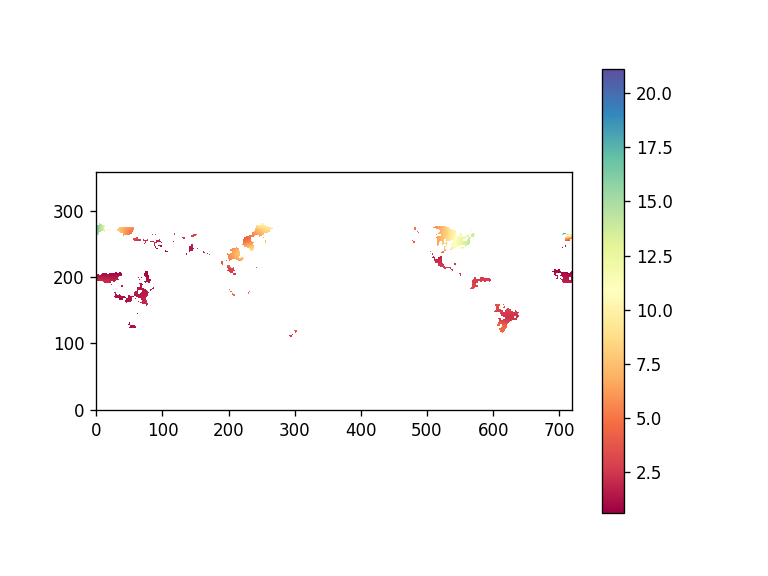

In [44]:
plt.figure()
plt.imshow(pred_mean[0, ...], origin='lower',  cmap='Spectral')
plt.colorbar()

In [45]:
res_gaussian[res_gaussian == -np.inf] = -20

<IPython.core.display.Javascript object>


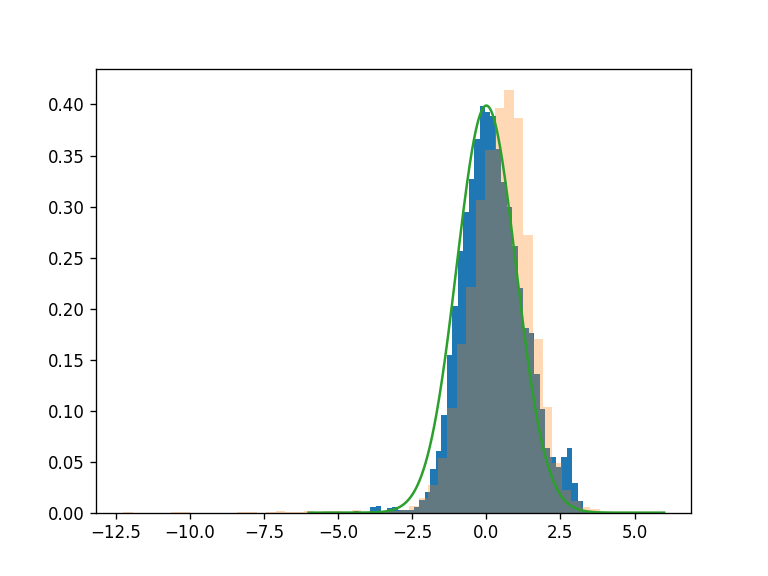

<IPython.core.display.Javascript object>


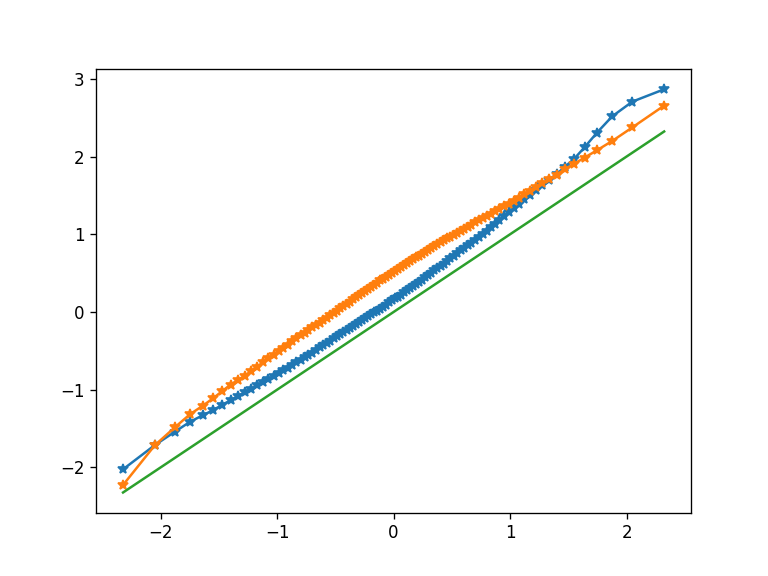

In [46]:
from scipy.stats import norm

qs = np.quantile(res[~np.isnan(res)], np.linspace(0, 1, 100)[1:-1])
qs_gaussian = np.quantile(res_gaussian[~np.isnan(res_gaussian)], np.linspace(0, 1, 100)[1:-1])
qs_th = norm.ppf(np.linspace(0, 1, 100)[1:-1])

plt.figure()
plt.hist(res.flatten(), bins=50, density=True, log=False)
plt.hist(res_gaussian.flatten(), bins=50, density=True, log=False, alpha=0.3)

plt.plot(np.linspace(-6, 6, 1000), norm.pdf(np.linspace(-6, 6, 1000)))

plt.figure()
plt.plot(qs_th, qs, '-*')
plt.plot(qs_th, qs_gaussian, '-*')

plt.plot(qs_th, qs_th)

In [47]:
res.shape

(2, 360, 720)

<IPython.core.display.Javascript object>


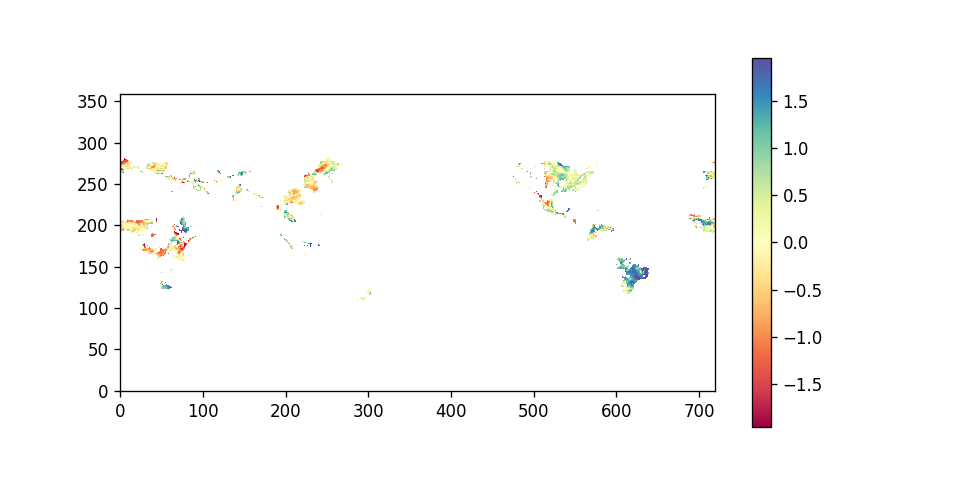

<IPython.core.display.Javascript object>


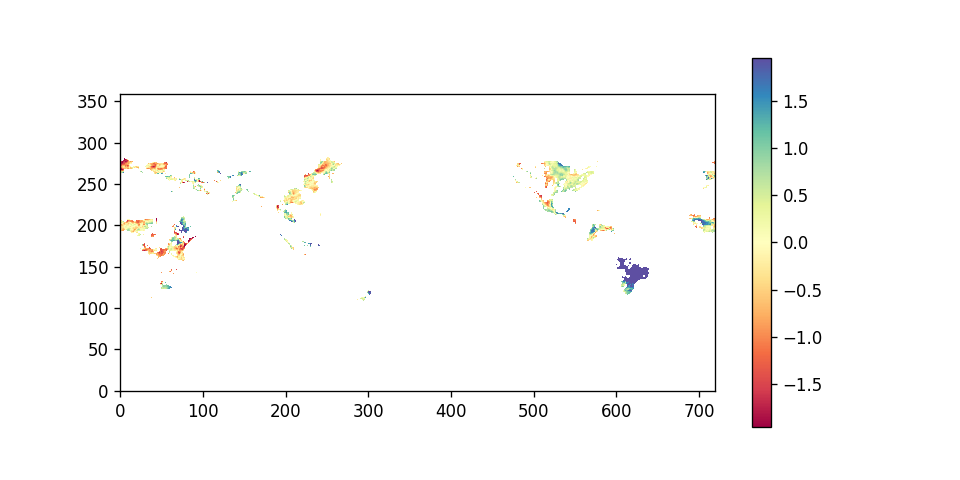

In [50]:
for i in range(2):
    plt.figure(figsize=(8,4))
    plt.imshow(res[i, ...], origin='lower', vmin=-1.96, vmax=1.96, cmap='Spectral')
    plt.colorbar()

In [51]:
x, y = -0.5, 46

features_time = []

for year in range(1981, 2012):
    features_time.append(np.array([y, x, year]))

features_time = np.stack(features_time, axis=0)

features_time = (features_time - mean_features) / std_features

In [52]:
features_time = torch.from_numpy(features_time).to(dtype=torch.float32)

with torch.no_grad():
    nn.eval()
    out_time = nn(features_time)
    lb, ub = loss.predict_ci(out_time, 0.01)
    lb2, ub2 = loss.predict_ci(out_time, 0.95)

<IPython.core.display.Javascript object>


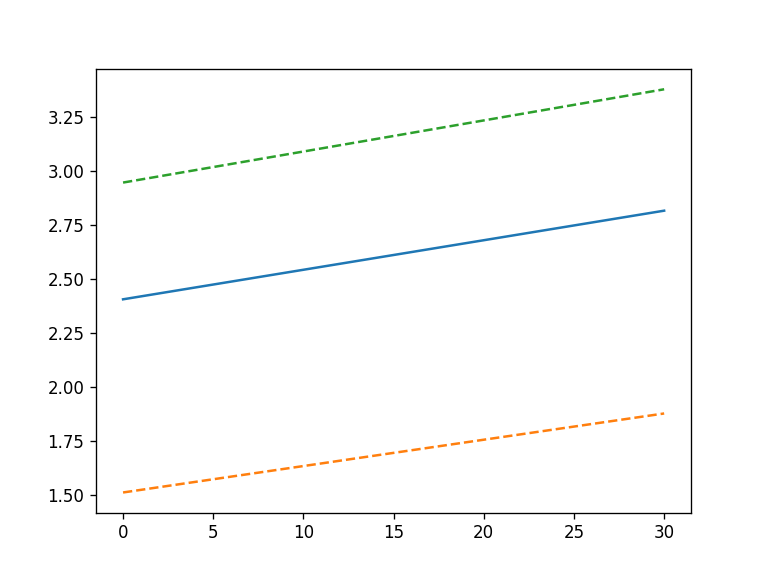

In [53]:
plt.figure()
plt.plot((mean_targets + lb * std_targets))
plt.plot((mean_targets + lb2 * std_targets), '--')
plt.plot((mean_targets + ub2 * std_targets), '--')

In [102]:
ub2 - lb

tensor([[0.3416],
        [0.3387],
        [0.3361],
        [0.3338],
        [0.3316],
        [0.3297],
        [0.3280],
        [0.3265],
        [0.3252],
        [0.3240],
        [0.3229],
        [0.3220],
        [0.3211],
        [0.3204],
        [0.3198],
        [0.3193],
        [0.3188],
        [0.3185],
        [0.3181],
        [0.3179],
        [0.3177],
        [0.3176],
        [0.3175],
        [0.3175],
        [0.3175],
        [0.3176],
        [0.3176],
        [0.3178],
        [0.3179],
        [0.3181],
        [0.3183]])

In [103]:
lb - lb2

tensor([[0.4500],
        [0.4445],
        [0.4393],
        [0.4345],
        [0.4301],
        [0.4260],
        [0.4221],
        [0.4185],
        [0.4152],
        [0.4120],
        [0.4091],
        [0.4063],
        [0.4037],
        [0.4012],
        [0.3989],
        [0.3967],
        [0.3946],
        [0.3926],
        [0.3907],
        [0.3889],
        [0.3872],
        [0.3856],
        [0.3840],
        [0.3825],
        [0.3810],
        [0.3796],
        [0.3782],
        [0.3769],
        [0.3756],
        [0.3744],
        [0.3731]])